<a href="https://colab.research.google.com/github/iamMchoi/CNN/blob/master/CNN_Dogs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Connection into Collab from Github
!git clone https://github.com/iamMchoi/CNN.git

# Files from the cloned git repository.
!ls CNN

#read file from github
import pandas as pd
df = pd.read_excel('courses/deeplearning1/excel/layers_example.xlsx')

In [18]:
!git clone https://github.com/iamMchoi/CNN.git
!cd CNN
!git add '/content/drive/My Drive/Colab Notebooks/CNN Dogs_Cats.ipynb'
!git commit --message="Add /content/drive/My Drive/Colab Notebooks/CNN Dogs_Cats.ipynb"

fatal: destination path 'CNN' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [13]:
!git clone https://github.com/iamMchoi/CNN.git

Cloning into 'CNN'...


In [12]:
!ls-ltr

/bin/bash: ls-ltr: command not found


##Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/"
import os
os.listdir(DATA_PATH)

['CNN Dogs_Cats.ipynb']

##Unzip data in Google drive

In [0]:
import zipfile
import io

zf = zipfile.ZipFile(DATA_PATH+"PetImages.zip", "r")
zf.extractall(DATA_PATH)

## Read Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [0]:
IMG_SIZE = 100
DATADIR = DATA_PATH + "PetImages"
CATEGORIES = ["Dog", "Cat"]

training_data = []

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    class_num = CATEGORIES.index(category) #L.index(value, [start, [stop]])->integer:return first index of value.// 0(=Dog), 1(=Cat)
    
    for img in os.listdir(path):  # iterate over each image per dogs and cats
      try:                        #Try and Except in Python ; If no exception, Try is executed. If any exception, Except is excuted
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  #cv2.imread(image file, parms)/convert to array        
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
        training_data.append([new_array, class_num])  # add this to our training_data
      except Exception as e:  # in the interest in keeping the output clean...
        pass

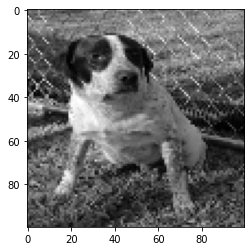

In [0]:
# example
plt.imshow(training_data[0][0], cmap='gray')  # graph it
plt.show()  # display!

In [0]:
#Random Shuffling
import random

random.shuffle(training_data)

In [0]:
# X, Y Label split  x_train, y_train
x_train = []
y_train = []

for features,label in training_data:
    x_train.append(features)
    y_train.append(label)

#Inintialize x_train
x_train = np.array(x_train).astype('float32')/255.

#x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print(x_train.shape, x_train.dtype, x_train.ndim)
print(len(y_train))

(599, 100, 100, 1) float32 4
599


In [0]:
print(x_train.shape, type(x_train))
kk=x_train.shape
print(kk[1:])
#print(x_train.shape[1:])

(599, 100, 100, 1) <class 'numpy.ndarray'>
(100, 100, 1)


## Make Model : CNN Prediction 

* Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis)
e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".

* MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', ata_format=None,**kwargs)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=x_train.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8667200   
_________________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_split=0.1)
#model.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.3, callbacks=[tbCallBack])  ### callbacks is for TensorBoard

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 539 samples, validate on 60 samples
Epoch 1/2
539/539 [==============================] - 47s 87ms/sample - loss: 0.9107 - acc: 0.5232 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 2/2
539/539 [==============================] - 46s 86ms/sample - loss: 0.6864 - acc: 0.5380 - val_loss: 0.6913 - val_acc: 0.4833


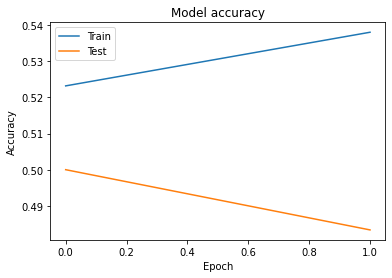

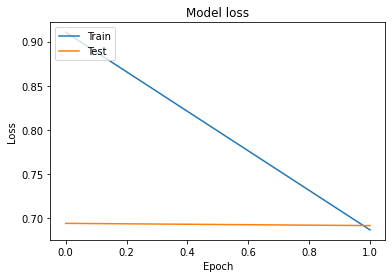

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
#score = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

In [0]:
from google.colab import files
file=files.upload()
#Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.


Saving cot.jpg to cot.jpg


In [0]:
for fn in file.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(file[fn])))
  
  #Read image file // fn is file's keys of dictionary. It is read in the for root
  img_test = cv2.imread(fn,cv2.IMREAD_GRAYSCALE)

User uploaded file "cot.jpg" with length 6169 bytes


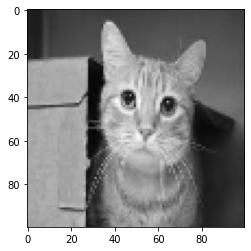

In [0]:
# after read 
test_data = cv2.resize(img_test, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
#training_data.append([test_array, class_num])  # add this to our training_data

# example
#plt.imshow(training_data[0][0], cmap='gray')  # graph it
plt.imshow(test_data, cmap='gray')  # graph it
plt.show()  # display!

In [0]:
#Inintialize x_train
x_test = np.array(test_data).astype('float32')/255.

x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print(x_test.shape, x_test.dtype, x_test.ndim)

(1, 100, 100, 1) float32 4


In [0]:
#Prediction
prediction = model.predict_classes(x_test)
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[0]]
Dog


In [0]:
kk= training_data[7][0]

plt.imshow(kk, cmap='gray')  # graph it
plt.show()  # display!

x_test = np.array(kk).astype('float32')/255.
x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict_classes(x_test)
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

## Save the model as file / Load the model

In [0]:
model.save(DATA_PATH+"256x2-CNN.model")

import tensorflow as tf
model = tf.keras.models.load_model(DATA_PATH+"256x2-CNN.model")

In [0]:
#display resized all numbers
count=0
nrows = 4
ncols = 5

plt.figure(figsize=(12,8))

for n in img_result:
  count +=1
  plt.subplot(nrows, ncols, count)
  plt.imshow(cv2.resize(n,(28,28)), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()